In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('bmh')

# Necessary Modules

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import module and function for CPC data extraction
from Module_CPC import *

# import functions for FTIR extraction and analysis
from Module_FTIR import All_Absorbance_Analysis, ShoowAllCorrectedAbsorbances

# For Image Analysis
from RGB_Collection_area import GetDiameterFromImage

# For final computation for aeral densities 
from Module_Computations import Particles2Absorbances

# Initial Elements

In [4]:
# Get the base folder for the compound
data_path = os.path.join("Data", "AmmSul")
if not os.path.exists(data_path) or not os.path.isdir(data_path):
    raise NotADirectoryError(f"Data path is not a valid directory: {data_path}")

# Folder for the CPC files 
CPC_folder_path = os.path.join(data_path, "CPC_Data")
if not os.path.exists(CPC_folder_path) or not os.path.isdir(CPC_folder_path):
    raise NotADirectoryError(f"CPCData folder is not a valid directory: {CPC_folder_path}")

# Folder for the FTIR files
FTIR_folder_path = os.path.join(data_path, "FTIR_Data")
if not os.path.exists(FTIR_folder_path) or not os.path.isdir(FTIR_folder_path):
    raise NotADirectoryError(f"FTIRData folder is not a valid directory: {FTIR_folder_path}")

# Folder for the FTIR files
Pictures_folder_path = os.path.join(data_path, "Pictures")
if not os.path.exists(FTIR_folder_path) or not os.path.isdir(FTIR_folder_path):
    raise NotADirectoryError(f"FTIRData folder is not a valid directory: {FTIR_folder_path}")

# Folder for the outputs
output_folder = os.path.join(data_path, "OUTPUT")
if not os.path.exists(output_folder) or not os.path.isdir(output_folder):
    os.mkdir(output_folder)

In [5]:
excel_filename = "samples.xlsx"
exp_excel_path = os.path.join(data_path, excel_filename)
if not os.path.exists(exp_excel_path) or not os.path.isfile(exp_excel_path):
    raise FileNotFoundError(f"Samples file does not exist: {exp_excel_path}")


In [6]:
exp_excel = pd.read_excel(exp_excel_path)
exp_excel

Sample Material  dia       M   rho         Q  aperture  \
0        1     ZnSe  200  132.14  1.77  5.944293      0.25   
1        1     ZnSe  200  132.14  1.77  5.944293      0.50   
2        1     ZnSe  200  132.14  1.77  5.944293      1.00   
3        1     ZnSe  200  132.14  1.77  5.944293      1.50   
4        1     ZnSe  200  132.14  1.77  5.944293      2.00   
..     ...      ...  ...     ...   ...       ...       ...   
91       9     ZnSe  200  132.14  1.77  5.944293      3.50   
92       9     ZnSe  200  132.14  1.77  5.944293      4.00   
93       9     ZnSe  200  132.14  1.77  5.944293      5.00   
94       9     ZnSe  200  132.14  1.77  5.944293      6.00   
95       9     ZnSe  200  132.14  1.77  5.944293      8.00   

                                 FTIR_clean  \
0   20230407ZnSeCr1Exp1CleanAppInMm0.25.DPT   
1    20230407ZnSeCr1Exp1CleanAppInMm0.5.DPT   
2    20230407ZnSeCr1Exp1CleanAppInMm1.0.DPT   
3    20230407ZnSeCr1Exp1CleanAppInMm1.5.DPT   
4    20230407ZnSeCr1Exp1CleanAppInMm2.0.DPT   
..                                      ...   
91   20230411ZnSeCr2Exp9CleanAppInMm3.5.DPT   
92   20230411ZnSeCr2Exp9CleanAppInMm4.0.DPT   
93   20230411ZnSeCr2Exp9CleanAppInMm5.0.DPT   
94   20230411ZnSeCr2Exp9CleanAppInMm6.0.DPT   
95   20230411ZnSeCr2Exp9CleanAppInMm8.0.DPT   

                                 FTIR_loaded  \
0   20230407ZnSeCr1Exp1ResultAppInMm0.25.DPT   
1    20230407ZnSeCr1Exp1ResultAppInMm0.5.DPT   
2    20230407ZnSeCr1Exp1ResultAppInMm1.0.DPT   
3    20230407ZnSeCr1Exp1ResultAppInMm1.5.DPT   
4    20230407ZnSeCr1Exp1ResultAppInMm2.0.DPT   
..                                       ...   
91   20230411ZnSeCr2ResultExp9AppInMm3.5.DPT   
92   20230411ZnSeCr2ResultExp9AppInMm4.0.DPT   
93   20230411ZnSeCr2ResultExp9AppInMm5.0.DPT   
94   20230411ZnSeCr2ResultExp9AppInMm6.0.DPT   
95   20230411ZnSeCr2ResultExp9AppInMm8.0.DPT   

                                 AIM_file  IMAGE_folder  cut_lower  cut_upper  
0   20230407ZnSeAmmSulCrystal1Exp1to4.csv           NaN          5         32  
1   20230407ZnSeAmmSulCrystal1Exp1to4.csv           NaN          5         32  
2   20230407ZnSeAmmSulCrystal1Exp1to4.csv           NaN          5         32  
3   20230407ZnSeAmmSulCrystal1Exp1to4.csv           NaN          5         32  
4   20230407ZnSeAmmSulCrystal1Exp1to4.csv           NaN          5         32  
..                                    ...           ...        ...        ...  
91             20230411ZnSeAmmSulExp8.csv           NaN         43         68  
92             20230411ZnSeAmmSulExp8.csv           NaN         43         68  
93             20230411ZnSeAmmSulExp8.csv           NaN         43         68  
94             20230411ZnSeAmmSulExp8.csv           NaN         43         68  
95             20230411ZnSeAmmSulExp8.csv           NaN         43         68  

[96 rows x 13 columns]

In [7]:
# check for consistency
if len(exp_excel["dia"].unique())>1:
    print("Expected only 1 diameter")
elif len(exp_excel["M"].unique())>1:
    print("Expected only 1 mass")
elif len(exp_excel["rho"].unique())>1:
    print("Expected only 1 rho")
else:
    print("Ok..")

Ok..


----
# Computation of the CPC Analysis

In [ ]:
# Import module and function for CPC data extraction
from CPC_extraction_module import *

In [ ]:
tt = pd.read_excel("Data/AmmSul/samples.xlsx")
old_filename = None


for exp in exp_excel["Sample"].unique():
    print(f"Processing experiment {exp}........")
    rows = exp_excel[exp_excel["Sample"]==exp]

    filename = rows["AIM_file"].unique()
    start_exp = rows["cut_lower"].unique()
    end_exp = rows["cut_upper"].unique()

    if len(filename)>1:
        print(f"error, filename not unique for exp {exp}")
    else :
        filename = os.path.join(data_path,filename[0])
    if len(start_exp)>1:
        print(f"error, lower cut number not correct for exp {exp}")
    else:
        start_exp = start_exp[0]
    if len(end_exp)>1:
        print(f"error, upper cut number not correct for exp {exp}")
    else:
        end_exp = end_exp[0]

    if not filename==old_filename:
        AmmSulCPCFile = CPC_File(filename)
        old_filename = filename

    ExpConc = AmmSulCPCFile.extract_experiment_conc(start_sample=start_exp, end_sample=end_exp)
    C_before, C_after, C_base, C_error, C_collection, C_time = AnalyseExpConcTruncated(ExpConc, h=1500, expName = "Exp"+str(exp), output_folder = output_folder)

    results = {'Filename': filename,
               'Experiment Number': exp,
               'Start sample': start_exp,
               'End sample': end_exp,
               'Concentration before': C_before,
               'Concentration after': C_after,
               'Concentration base (mean)': C_base,
               'Concentration error (deviation)': C_error,
               'Concentration collection (mean)': C_collection,
               'Collection time (sec)': C_time,
               'Total collection (part per cm3)': (C_base-C_collection)*C_time,
               'Total collection error (part per cm3)': C_error * C_time}

    # Open a new CSV file for writing
    with open(output_folder + f'Exp{exp}CPCMeasuresResults.csv', 'w', newline='') as csvfile:
        # Define the field names for the CSV file
        fieldnames = list(results.keys())

        # Create a writer object for the CSV file and write the header row
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Write the data rows to the CSV file
        writer.writerow(results)

# FTIR extraction and Analysis

Processing experiment 1........
saved fig to ... Data\AmmSul\OUTPUT\FTIR_comparison_Exp1_deg4.png
saved results to ... Data\AmmSul\OUTPUT\Exp1FTIRResults.csv and Data\AmmSul\OUTPUT\Exp1FTIRResults.json
Processing experiment 2........
saved fig to ... Data\AmmSul\OUTPUT\FTIR_comparison_Exp2_deg4.png
saved results to ... Data\AmmSul\OUTPUT\Exp2FTIRResults.csv and Data\AmmSul\OUTPUT\Exp2FTIRResults.json
Processing experiment 3........
saved fig to ... Data\AmmSul\OUTPUT\FTIR_comparison_Exp3_deg4.png
saved results to ... Data\AmmSul\OUTPUT\Exp3FTIRResults.csv and Data\AmmSul\OUTPUT\Exp3FTIRResults.json
Processing experiment 4........
saved fig to ... Data\AmmSul\OUTPUT\FTIR_comparison_Exp4_deg4.png
saved results to ... Data\AmmSul\OUTPUT\Exp4FTIRResults.csv and Data\AmmSul\OUTPUT\Exp4FTIRResults.json
Processing experiment 6........
saved fig to ... Data\AmmSul\OUTPUT\FTIR_comparison_Exp6_deg4.png
saved results to ... Data\AmmSul\OUTPUT\Exp6FTIRResults.csv and Data\AmmSul\OUTPUT\Exp6FTIRRes

True

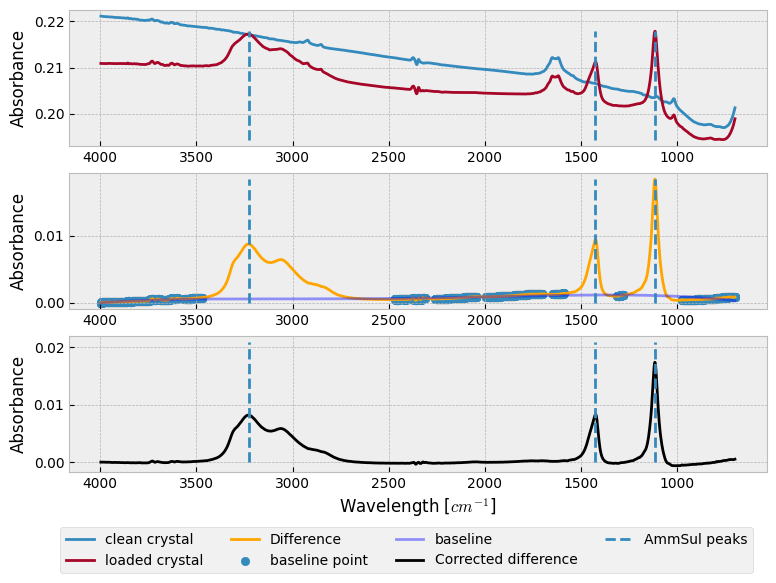

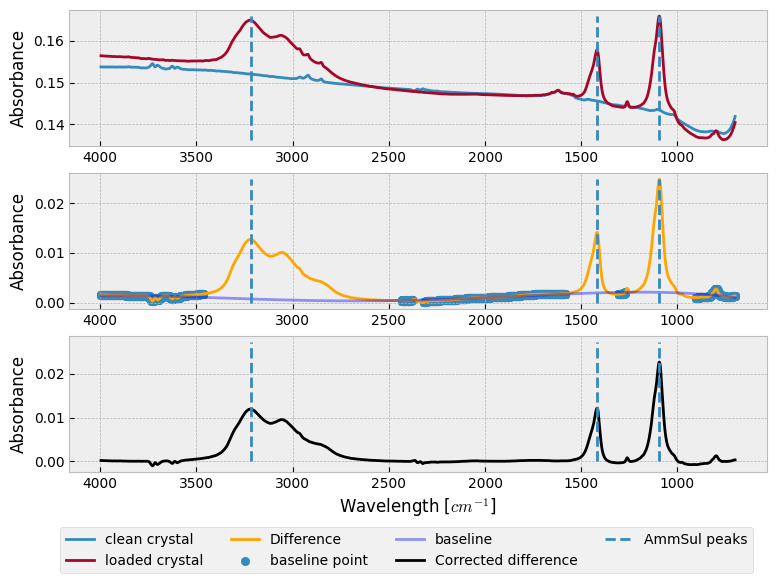

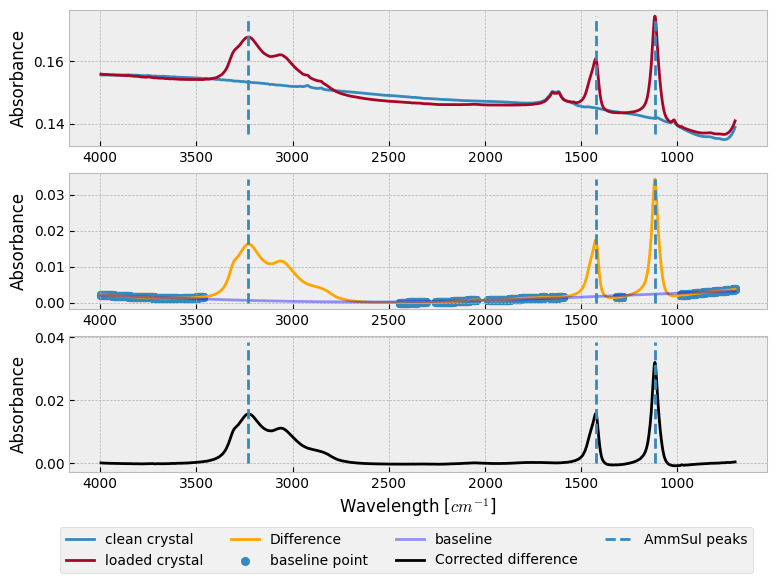

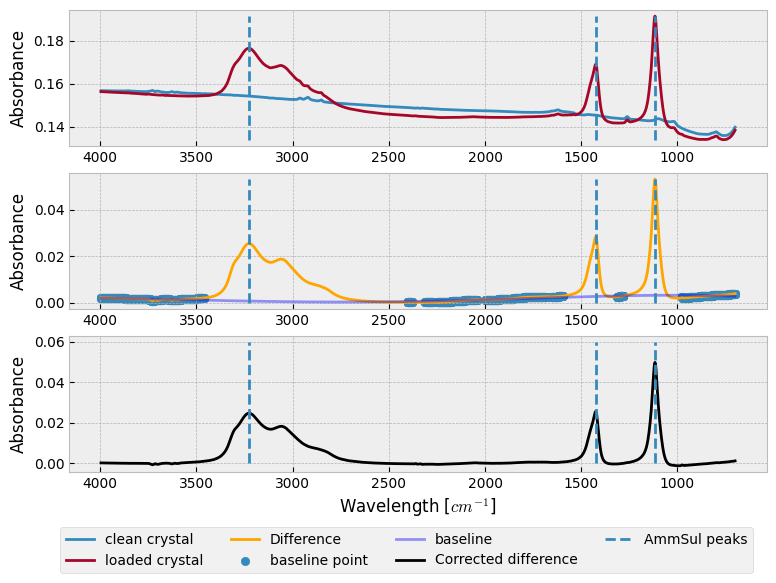

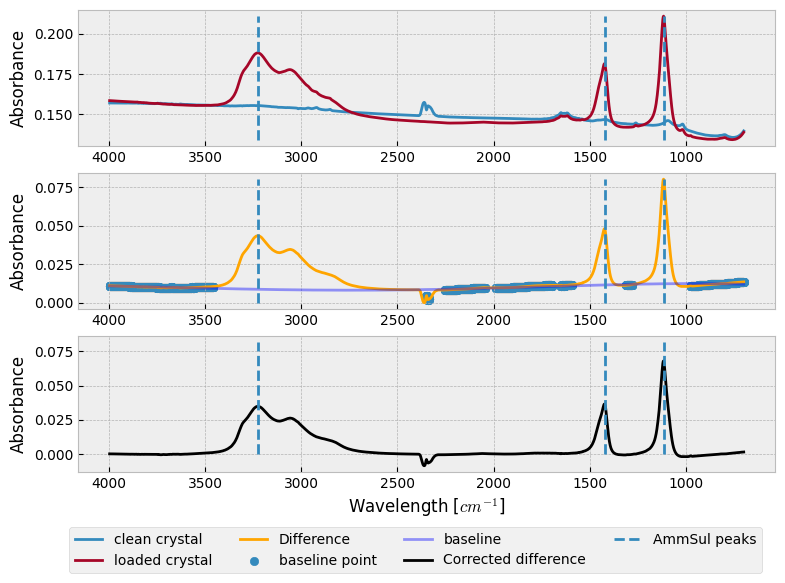

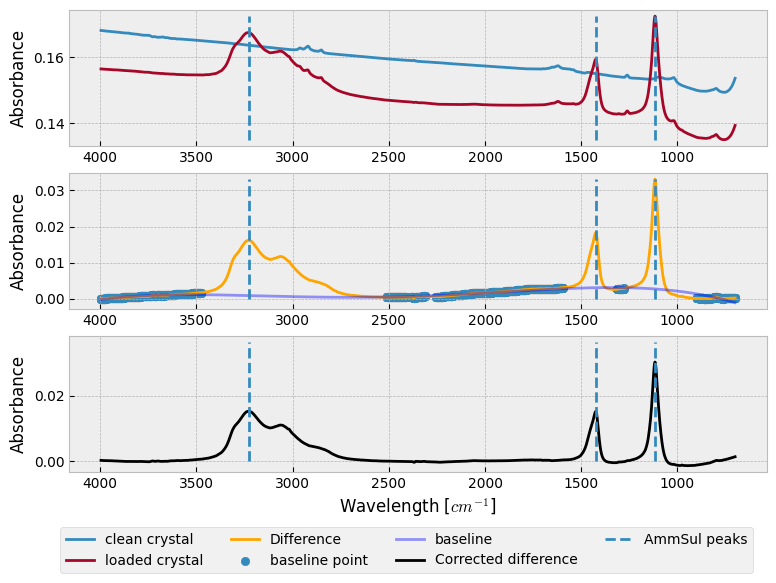

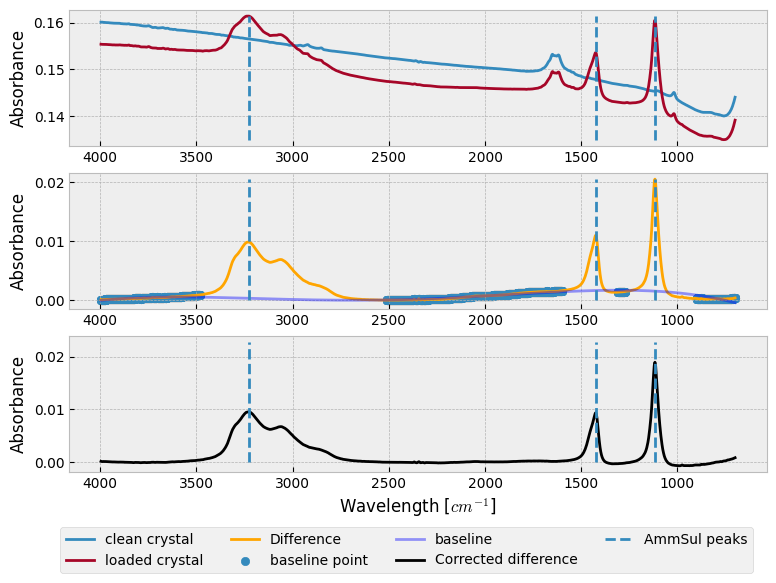

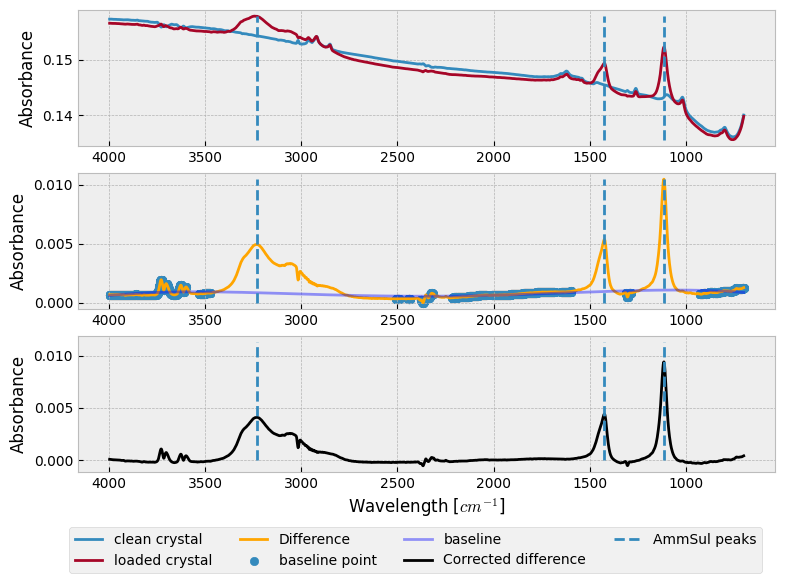

In [39]:
All_Absorbance_Analysis(excel_file=exp_excel_path, data_path=FTIR_folder_path, output_folder=output_folder,
                        peak_locations=[1110, 1410, 3300], peak_height=0.001, distance_between_peaks= 100)

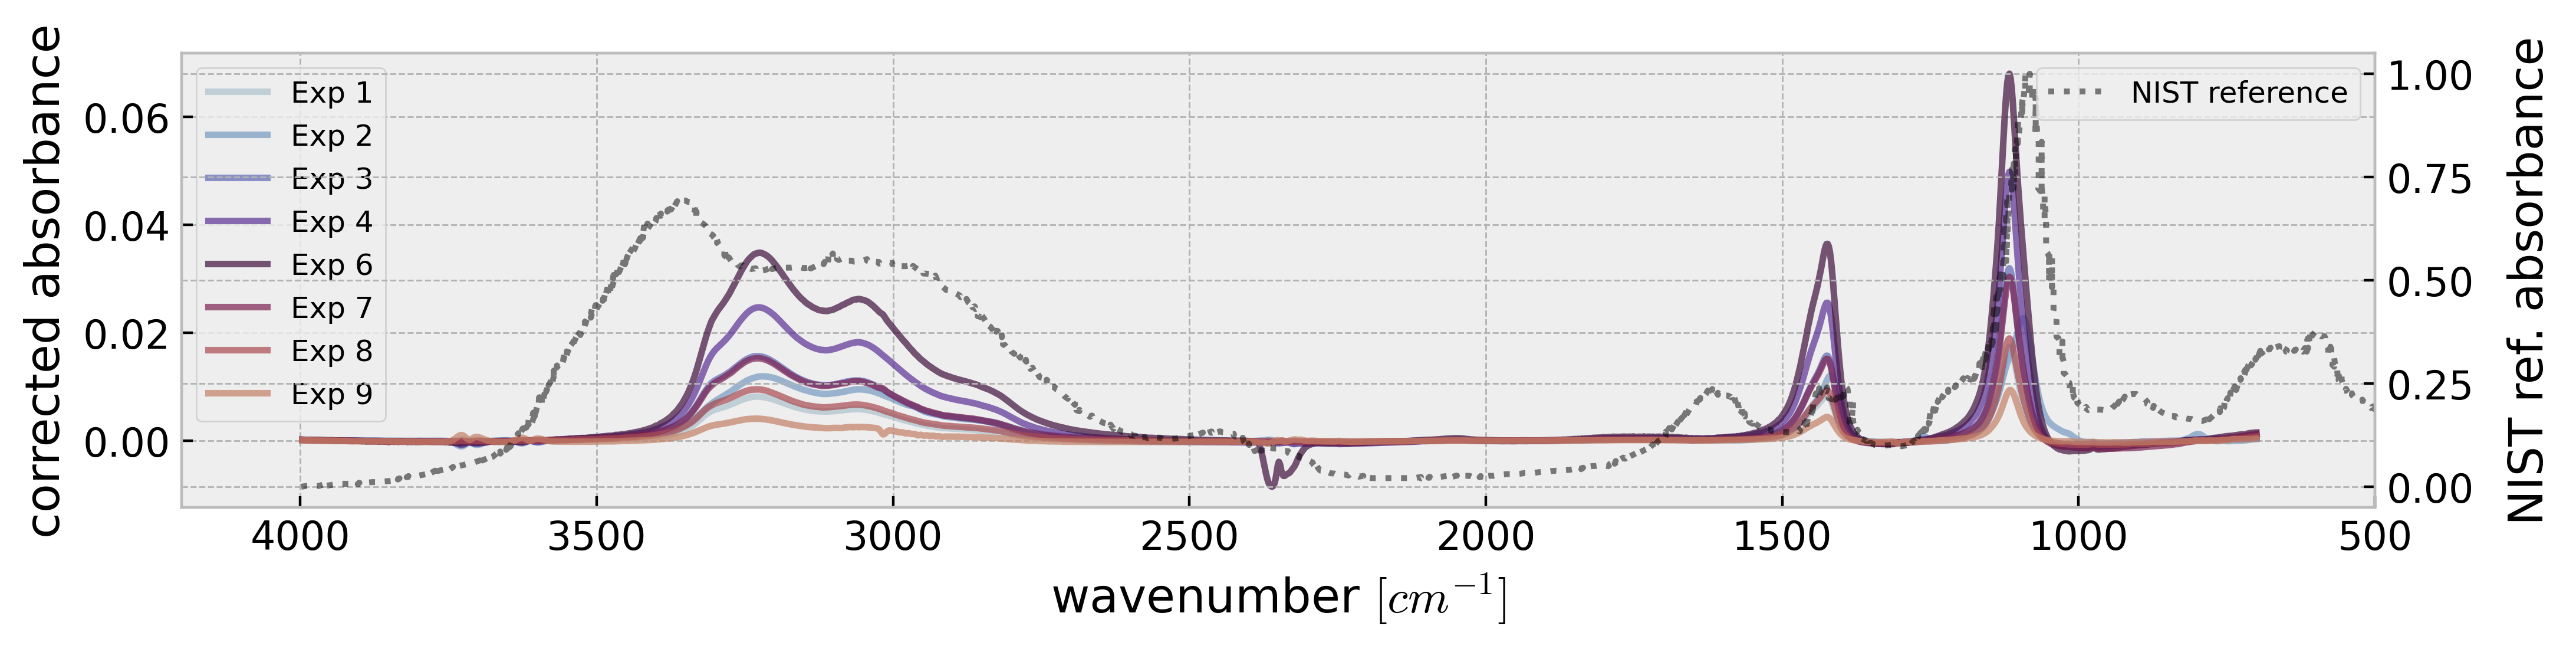

True

In [42]:
nist_file = os.path.join("Data","NIST", "ammonium_sulfate.csv")
ShoowAllCorrectedAbsorbances(excel_datafrane=exp_excel, output_folder_path=output_folder, nist_filepath=nist_file)

# Computation of the measure related to absorbance

## Option A: Calculate particles to areal mass density and absorbances

In [102]:
from Module_Computations import Particles2Absorbances
data_dict = Particles2Absorbances(exp_excel, data_path=data_path, output_folder=output_folder, ComputeDiameterFromImage=False)


## Option B: To run to get values 

In [8]:
aerial_density_json_filepath = os.path.join(output_folder, "ParticlesAndAbsorbances.json")
if not os.path.exists(aerial_density_json_filepath):
    raise NotADirectoryError(f"json file not valid directory: {aerial_density_json_filepath}")

with open(aerial_density_json_filepath) as json_file:
    data_dict = json.load(json_file)

Masses = np.array(data_dict["Masses"])
Masses_error = np.array(data_dict["Masses_error"])
N_as = np.array(data_dict["N_as"])
N_as_error = np.array(data_dict["N_as_error"])
Exps = np.array(data_dict["Exps"])

peaks_wv = np.loadtxt(os.path.join(output_folder,"PeaksWavelengthsArray.csv"), delimiter=',')
peaks_abs = np.loadtxt(os.path.join(output_folder, "PeaksAbsorbanceArray.csv"), delimiter=',')

## Plots

# Full linear regression

4035.6628667349783


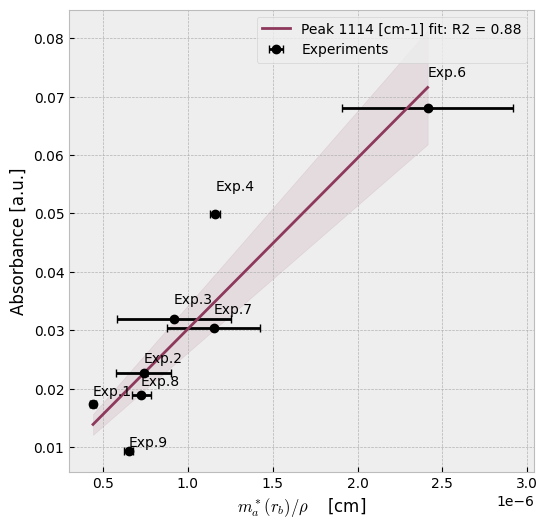

0.0009696221408351142
MeasAttenuationCoeff = 2184.17045857853
MeasAttenuationCoeff_std = 301.2838933391864


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Input data with errors
x_data =N_as# Estimated thickness with errors
x_ref = np.linspace(np.min(x_data), np.max(x_data), 100) # some more values to fit regression
x_error = N_as_error # Error in x-axis measurements

# Linear regression for y_data i 
i = 0
peak_i = np.mean(peaks_wv[:,i])
y_data = peaks_abs[:,i]

slope, intercept, r_value, p_value, std_err = linregress(np.append(x_data,0), np.append(y_data,0))
print(std_err)
y_fit = slope * x_ref + intercept
y_error_min = y_fit - std_err * x_ref
y_error_max = y_fit + std_err * x_ref


plt.figure(figsize=(6,6))
# Experiments
plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o',color = 'k', label='Experiments')
# Annotation
for i,exp in enumerate(Exps):
    plt.annotate('Exp.'+str(exp),[1*x_data[i],1.08*y_data[i]], xycoords = 'data')
# Linear regression
plt.plot(x_ref, y_fit,label=f'Peak {peak_i:.0f} [cm-1] fit: R2 = {r_value**2:.2f}', color = '#8e395c')
#plt.plot(x_ref, y2_error_min, dashes= [6,6], alpha=0.5, color = '#CBA8FF', label = '95% Prediction Interval')
#plt.plot(x_ref, y2_error_max, dashes = [6, 6], alpha=0.5, color = '#CBA8FF')
plt.fill_between(x_ref, y_fit - std_err * x_ref, y_fit + std_err * x_ref, color ='#8e395c', alpha=0.1)

plt.xlabel(r'$m_a^*(r_b)/\rho \quad$ [cm]')
plt.ylabel('Absorbance [a.u.]')
plt.legend()
plt.savefig(os.path.join(output_folder,f"LinReg_peak{peak_i:.0f}.png"), dpi=200, bbox_inches='tight')
plt.show()

MolarMass = exp_excel["M"].unique()[-1]
rho = exp_excel["rho"].unique()[-1]

MeasAttenuationCoeff_1 = slope * MolarMass / rho / 1000
MeasStd_1 = std_err * MolarMass / rho / 1000
print(intercept)
print(f"MeasAttenuationCoeff = {MeasAttenuationCoeff_1}")
print(f"MeasAttenuationCoeff_std = {MeasStd_1}")

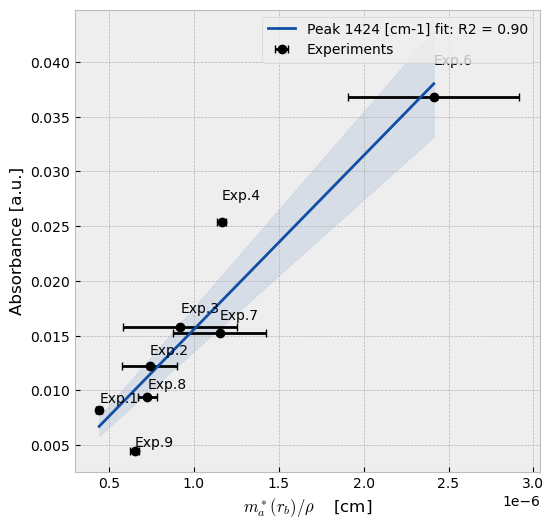

-0.00029323199779367724
MeasAttenuationCoeff = 1184.7963784165784
MeasAttenuationCoeff_std = 150.2172268728855


In [107]:
# Linear regression for y_data i 
i =1
peak_i = np.mean(peaks_wv[:,i])
y_data = peaks_abs[:,i]

slope, intercept, r_value, p_value, std_err = linregress(np.append(x_data,0), np.append(y_data,0))
y_fit = slope * x_ref + intercept
y_error_min = y_fit - std_err * x_ref
y_error_max = y_fit + std_err * x_ref


plt.figure(figsize=(6,6))
# Experiments
plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o',color = 'k', label='Experiments')
# Annotation
for i,exp in enumerate(Exps):
    plt.annotate('Exp.'+str(exp),[1*x_data[i],1.08*y_data[i]], xycoords = 'data')
# Linear regression
plt.plot(x_ref, y_fit,label=f'Peak {peak_i:.0f} [cm-1] fit: R2 = {r_value**2:.2f}', color = '#104fa4')
#plt.plot(x_ref, y2_error_min, dashes= [6,6], alpha=0.5, color = '#CBA8FF', label = '95% Prediction Interval')
#plt.plot(x_ref, y2_error_max, dashes = [6, 6], alpha=0.5, color = '#CBA8FF')
plt.fill_between(x_ref, y_fit - std_err * x_ref, y_fit + std_err * x_ref, color ='#104fa4', alpha=0.1)

plt.xlabel(r'$m_a^*(r_b)/\rho \quad$ [cm]')
plt.ylabel('Absorbance [a.u.]')
plt.legend()
plt.savefig(os.path.join(output_folder,f"LinReg_peak{peak_i:.0f}.png"), dpi=200, bbox_inches='tight')
plt.show()

MolarMass = exp_excel["M"].unique()[-1]
rho = exp_excel["rho"].unique()[-1]

MeasAttenuationCoeff_1 = slope * MolarMass / rho / 1000
MeasStd_1 = std_err * MolarMass / rho / 1000
print(intercept)
print(f"MeasAttenuationCoeff = {MeasAttenuationCoeff_1}")
print(f"MeasAttenuationCoeff_std = {MeasStd_1}")

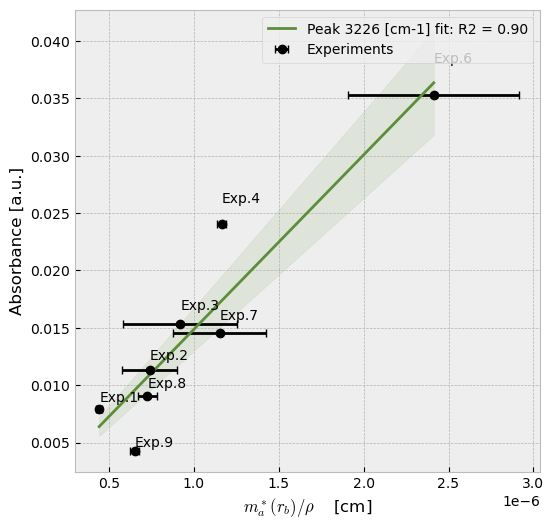

15197.250503977037
MeasAttenuationCoeff = 1134.5563172856075
MeasAttenuationCoeff_std = 140.7945945893599


In [109]:
# Linear regression for y_data i 
i =2
peak_i = np.mean(peaks_wv[:,i])
y_data = peaks_abs[:,i]

slope, intercept, r_value, p_value, std_err = linregress(np.append(x_data,0), np.append(y_data,0))
y_fit = slope * x_ref + intercept
y_error_min = y_fit - std_err * x_ref
y_error_max = y_fit + std_err * x_ref


plt.figure(figsize=(6,6))
# Experiments
plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o',color = 'k', label='Experiments')
# Annotation
for i,exp in enumerate(Exps):
    plt.annotate('Exp.'+str(exp),[1*x_data[i],1.08*y_data[i]], xycoords = 'data')
# Linear regression
plt.plot(x_ref, y_fit,label=f'Peak {peak_i:.0f} [cm-1] fit: R2 = {r_value**2:.2f}', color = '#5c8e39')
#plt.plot(x_ref, y2_error_min, dashes= [6,6], alpha=0.5, color = '#CBA8FF', label = '95% Prediction Interval')
#plt.plot(x_ref, y2_error_max, dashes = [6, 6], alpha=0.5, color = '#CBA8FF')
plt.fill_between(x_ref, y_fit - std_err * x_ref, y_fit + std_err * x_ref, color ='#5c8e39', alpha=0.1)

plt.xlabel(r'$m_a^*(r_b)/\rho \quad$ [cm]')
plt.ylabel('Absorbance [a.u.]')
plt.legend()
plt.savefig(os.path.join(output_folder,f"LinReg_peak{peak_i:.0f}.png"), dpi=200, bbox_inches='tight')
plt.show()

MolarMass = exp_excel["M"].unique()[-1]
rho = exp_excel["rho"].unique()[-1]

MeasAttenuationCoeff_1 = slope * MolarMass / rho / 1000
MeasStd_1 = std_err * MolarMass / rho / 1000
print(slope)
print(f"MeasAttenuationCoeff = {MeasAttenuationCoeff_1}")
print(f"MeasAttenuationCoeff_std = {MeasStd_1}")

## Combined plot

Peak .... 0
peak: 1113.59 cm-1: Y = 29256.710*x + 0.00097
0.0009696221408351142
MeasAttenuationCoeff = 2184.17045857853
MeasAttenuationCoeff_std = 301.2838933391864
Peak .... 1
peak: 1423.87 cm-1: Y = 15755.972*x + -0.00022
-0.00022132805701268778
MeasAttenuationCoeff = 1176.2679009178273
MeasAttenuationCoeff_std = 153.82816693989523
Peak .... 2
peak: 3226.26 cm-1: Y = 15057.920*x + 0.00009
8.938055292374673e-05
MeasAttenuationCoeff = 1124.1545370700428
MeasAttenuationCoeff_std = 149.0875390788593


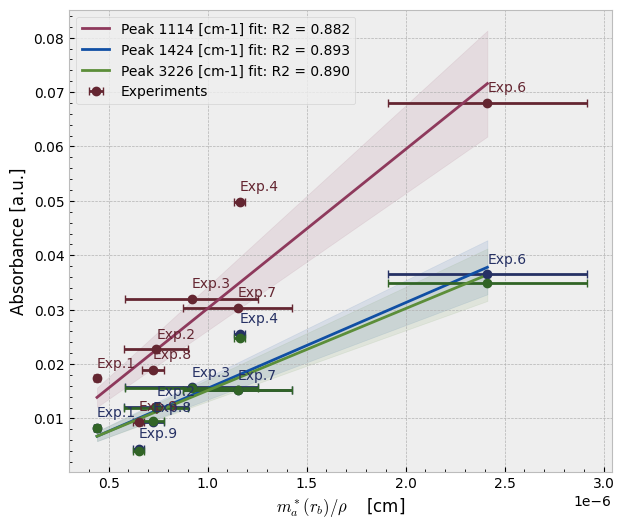

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Input data with errors
x_data =N_as# Estimated thickness with errors
x_ref = np.linspace(np.min(x_data), np.max(x_data), 100) # some more values to fit regression
x_error = N_as_error # Error in x-axis measurements

colors_list  = ['#8e395c', '#104fa4', '#5c8e39']
colors_errorbars = ["#642631", "#263164", "#316426"]


# Linear regression for y_data i 
fig, ax = plt.subplots(1,1,figsize=(7,6))
for peak_num in range(peaks_wv.shape[1]):
    print(f"Peak .... {peak_num}")
    peak_i = np.mean(peaks_wv[:,peak_num])
    y_data = peaks_abs[:,peak_num]

    slope, intercept, r_value, p_value, std_err = linregress(np.append(x_data,0), np.append(y_data,0))
    print(f"peak: {peak_i:.2f} cm-1: Y = {slope:.3f}*x + {intercept:.5f}")
    y_fit = slope * x_ref + intercept
    y_error_min = y_fit - std_err * x_ref
    y_error_max = y_fit + std_err * x_ref

    # Experiments
    if peak_num == 0:
        plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o', label='Experiments', color = colors_errorbars[peak_num])
    else : 
        plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o', color = colors_errorbars[peak_num])
    # Annotation
    if peak_num != 2:
        for i,exp in enumerate(Exps):
            plt.annotate('Exp.'+str(exp),[1*x_data[i],0.002 + y_data[i]], xycoords = 'data', color = colors_errorbars[peak_num])
    # Linear regression
    plt.plot(x_ref, y_fit,label=f'Peak {peak_i:.0f} [cm-1] fit: R2 = {r_value**2:.3f}', color = colors_list[peak_num] )
    #plt.plot(x_ref, y2_error_min, dashes= [6,6], alpha=0.5, color = '#CBA8FF', label = '95% Prediction Interval')
    #plt.plot(x_ref, y2_error_max, dashes = [6, 6], alpha=0.5, color = '#CBA8FF')
    plt.fill_between(x_ref, y_fit - std_err * x_ref, y_fit + std_err * x_ref, color = colors_list[peak_num], alpha=0.1)


    MolarMass = exp_excel["M"].unique()[-1]
    rho = exp_excel["rho"].unique()[-1]

    MeasAttenuationCoeff_1 = slope * MolarMass / rho / 1000
    MeasStd_1 = std_err * MolarMass / rho / 1000
    print(intercept)
    print(f"MeasAttenuationCoeff = {MeasAttenuationCoeff_1}")
    print(f"MeasAttenuationCoeff_std = {MeasStd_1}")
    
plt.minorticks_on()
plt.grid(True, which="major")
#plt.grid(True, which='major', linestyle = '-', )
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.xlabel(r'$m_a^*(r_b)/\rho \quad$ [cm]')
plt.ylabel('Absorbance [a.u.]')
plt.legend()

plt.savefig(os.path.join(output_folder,f"LinReg_peaks_all.png"), dpi=200, bbox_inches='tight')
plt.show()

# Peaks median and deviation

In [10]:
m1110, std1110 = np.median(peaks_wv[:,0]), np.std(peaks_wv[:,0])
m1410, std1410 = np.median(peaks_wv[:,1]), np.std(peaks_wv[:,1])
print(m1110, std1110, std1110/m1110 * 100)
print(m1410, std1410, std1410/m1110 * 100)

1116.72607 7.589530384948762 0.6796232835281406
1424.356135 2.4467897396228246 0.21910384340027314


Text(0.5, 1.0, 'NH4 peak')

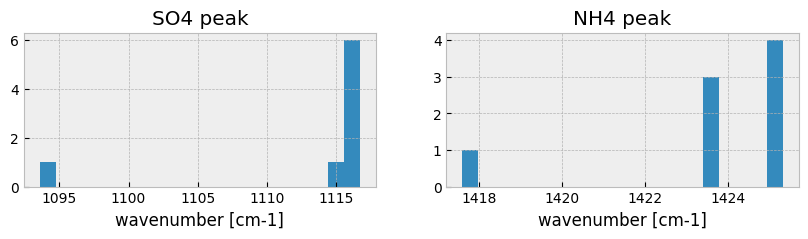

In [20]:
#For Ammonium Sulfate a peak between the wavenumbers 620-1115 cm−1 corresponds to the sulfate
#bands, a peak around 1410 cm−1 is related to the antisymmetric bending of ammonium and a peak
#between 2800-3300 cm−1 is related to stretching of the N-H bond (Braban and Abbatt, 2004, Oxton
#et al., 1976).
fig, axs = plt.subplots(1, 2, figsize=(10,2))
axs[0].hist(peaks_wv[:,0], bins=20)
axs[0].set_xlabel("wavenumber [cm-1]")
axs[0].set_title("SO4 peak")
axs[1].hist(peaks_wv[:,1], bins=20)
axs[1].set_xlabel("wavenumber [cm-1]")
axs[1].set_title("NH4 peak")

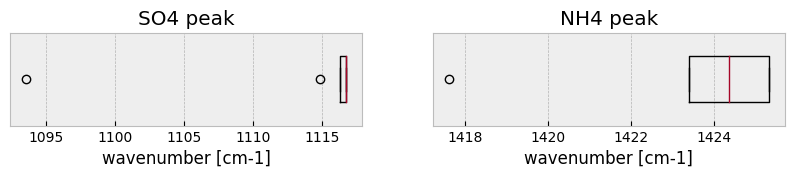

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10,1.2))
axs[0].boxplot(peaks_wv[:,0], vert=False, widths=0.5)
axs[0].set_xlabel("wavenumber [cm-1]")
axs[0].set_title("SO4 peak")
axs[0].set_yticks([])
axs[1].boxplot(peaks_wv[:,1], vert=False, widths=0.5)
axs[1].set_xlabel("wavenumber [cm-1]")
axs[1].set_title("NH4 peak")
axs[1].set_yticks([])

plt.savefig(os.path.join(output_folder, f"Boxplot_AmmSul.png"), dpi=200, bbox_inches='tight')